In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/feedback-prize-english-language-learning/sample_submission.csv
/kaggle/input/feedback-prize-english-language-learning/train.csv
/kaggle/input/feedback-prize-english-language-learning/test.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten, Bidirectional
from tensorflow.keras.models import Sequential, load_model, model_from_config
import tensorflow.keras.backend as K 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [69]:
X=pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/train.csv")
test=pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/test.csv")

In [70]:
X.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [71]:
test.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [72]:
X1=X["full_text"]
t1=test["full_text"]

In [73]:
X1

0       I think that students would benefit from learn...
1       When a problem is a change you have to let it ...
2       Dear, Principal\n\nIf u change the school poli...
3       The best time in life is when you become yours...
4       Small act of kindness can impact in other peop...
                              ...                        
3906    I believe using cellphones in class for educat...
3907    Working alone, students do not have to argue w...
3908    "A problem is a chance for you to do your best...
3909    Many people disagree with Albert Schweitzer's ...
3910    Do you think that failure is the main thing fo...
Name: full_text, Length: 3911, dtype: object

In [74]:
t1

0    when a person has no experience on a job their...
1    Do you think students would benefit from being...
2    Thomas Jefferson once states that "it is wonde...
Name: full_text, dtype: object

In [75]:
X_new=X1.append(t1,ignore_index=True)

In [76]:
X_new

0       I think that students would benefit from learn...
1       When a problem is a change you have to let it ...
2       Dear, Principal\n\nIf u change the school poli...
3       The best time in life is when you become yours...
4       Small act of kindness can impact in other peop...
                              ...                        
3909    Many people disagree with Albert Schweitzer's ...
3910    Do you think that failure is the main thing fo...
3911    when a person has no experience on a job their...
3912    Do you think students would benefit from being...
3913    Thomas Jefferson once states that "it is wonde...
Name: full_text, Length: 3914, dtype: object

In [77]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(X_new)

In [78]:
tfidf=result.toarray()

In [79]:
tfidf.shape

(3914, 21370)

In [80]:
X2=tfidf[:len(X1)]
test=tfidf[len(X1):]

In [81]:
test.shape

(3, 21370)

In [82]:
X.shape

(3911, 8)

In [83]:
X2.shape

(3911, 21370)

In [84]:
IP=X2.shape[1]
IP

21370

In [85]:
L=int(len(X.index))
L

3911

In [86]:
X1_train = X.loc[:int(L*0.8)]
y_train = X1_train[['syntax','cohesion','vocabulary','phraseology','grammar','conventions']]
X1_val = X.loc[int(L*0.8)+1:int(L*0.9)]
y_val = X1_val[['syntax','cohesion','vocabulary','phraseology','grammar','conventions']]
X1_test = X.loc[int(L*0.9)+1:]
y_test = X1_test[['syntax','cohesion','vocabulary','phraseology','grammar','conventions']]

In [87]:
tfidf_train=X2[:int(len(X.index)*0.8)+1]
tfidf_val=X2[int(len(X.index)*0.8)+1:int(len(X.index)*0.9)+1]
tfidf_test=X2[int(len(X.index)*0.9)+1:]

In [88]:
y1_train=y_train["syntax"]
y2_train=y_train["cohesion"]
y3_train=y_train["vocabulary"]
y4_train=y_train["phraseology"]
y5_train=y_train["grammar"]
y6_train=y_train["conventions"]

y1_val=y_val["syntax"]
y2_val=y_val["cohesion"]
y3_val=y_val["vocabulary"]
y4_val=y_val["phraseology"]
y5_val=y_val["grammar"]
y6_val=y_val["conventions"]

y1_test=y_test["syntax"]
y2_test=y_test["cohesion"]
y3_test=y_test["vocabulary"]
y4_test=y_test["phraseology"]
y5_test=y_test["grammar"]
y6_test=y_test["conventions"]


In [89]:
print(tfidf_train.shape)
print(y1_train.shape)
print(tfidf_val.shape)
print(y1_val.shape)
print(tfidf_test.shape)
print(y1_test.shape)

(3129, 21370)
(3129,)
(391, 21370)
(391,)
(391, 21370)
(391,)


In [90]:
y1_train = np.asarray(y1_train)
y1_val = np.asarray(y1_val)  
y1_test = np.asarray(y1_test)

y2_train = np.asarray(y2_train)
y2_val = np.asarray(y2_val)  
y2_test = np.asarray(y2_test)

y3_train = np.asarray(y3_train)
y3_val = np.asarray(y3_val)
y3_test = np.asarray(y3_test)

y4_train = np.asarray(y4_train)
y4_val = np.asarray(y4_val)  
y4_test = np.asarray(y4_test)  

y5_train = np.asarray(y5_train)
y5_val = np.asarray(y5_val)
y5_test = np.asarray(y5_test)

y6_train = np.asarray(y6_train)
y6_val = np.asarray(y6_val)  
y6_test = np.asarray(y6_test)

# Liner Regression :

In [25]:
lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()
lr4 = LinearRegression()
lr5 = LinearRegression()
lr6 = LinearRegression()

In [26]:
lr1.fit(tfidf_train, y1_train)
lr2.fit(tfidf_train, y2_train)
lr3.fit(tfidf_train, y3_train)
lr4.fit(tfidf_train, y4_train)
lr5.fit(tfidf_train, y5_train)
lr6.fit(tfidf_train, y6_train)

LinearRegression()

In [27]:
y1_pred = lr1.predict(tfidf_test)
y2_pred = lr2.predict(tfidf_test)
y3_pred = lr3.predict(tfidf_test)
y4_pred = lr4.predict(tfidf_test)
y5_pred = lr5.predict(tfidf_test)
y6_pred = lr6.predict(tfidf_test)

In [28]:
y1_pred = [round(r,1) for r in y1_pred]
y2_pred = [round(r,1) for r in y2_pred]
y3_pred = [round(r,1) for r in y3_pred]
y4_pred = [round(r,1) for r in y4_pred]
y5_pred = [round(r,1) for r in y5_pred]
y6_pred = [round(r,1) for r in y6_pred]

In [29]:
values1 = mean_squared_error(y1_pred, y1_test)
values2 = mean_squared_error(y2_pred, y2_test)
values3 = mean_squared_error(y3_pred, y3_test)
values4 = mean_squared_error(y4_pred, y4_test)
values5 = mean_squared_error(y5_pred, y5_test)
values6 = mean_squared_error(y6_pred, y6_test)

Test error for Linear Regression: 

In [30]:
test_error=values1+values2+values3+values4+values5+values6
test_mcrmse= test_error/6
test_mcrmse

0.5202514919011082

# SVR :

In [31]:
clf1 = SVR(C=10.0, epsilon=0.01)
clf2 = SVR(C=10.0, epsilon=0.01)
clf3 = SVR(C=10.0, epsilon=0.01)
clf4 = SVR(C=10.0, epsilon=0.01)
clf5 = SVR(C=10.0, epsilon=0.01)
clf6 = SVR(C=10.0, epsilon=0.01)

In [32]:
clf1.fit(tfidf_train, y1_train)
clf2.fit(tfidf_train, y2_train)
clf3.fit(tfidf_train, y3_train)
clf4.fit(tfidf_train, y4_train)
clf5.fit(tfidf_train, y5_train)
clf6.fit(tfidf_train, y6_train)

SVR(C=10.0, epsilon=0.01)

In [33]:
y1_pred = clf1.predict(tfidf_test)
y2_pred = clf2.predict(tfidf_test)
y3_pred = clf3.predict(tfidf_test)
y4_pred = clf4.predict(tfidf_test)
y5_pred = clf5.predict(tfidf_test)
y6_pred = clf6.predict(tfidf_test)

In [34]:
values1 = mean_squared_error(y1_pred, y1_test)
values2 = mean_squared_error(y2_pred, y2_test)
values3 = mean_squared_error(y3_pred, y3_test)
values4 = mean_squared_error(y4_pred, y4_test)
values5 = mean_squared_error(y5_pred, y5_test)
values6 = mean_squared_error(y6_pred, y6_test)

Test error for SVR:

In [35]:
test_error=values1+values2+values3+values4+values5+values6
test_mcrmse= test_error/6
test_mcrmse

0.29236973563330615

# Feedforward Neural Net

In [91]:
def get_model_nn():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(input_dim=IP,units=100, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(75, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(10, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(1, activation='relu'))
    print(model.summary())
    model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])
    return model

In [37]:
embedding_model1 = get_model_nn()
embedding_model2 = get_model_nn()
embedding_model3 = get_model_nn()
embedding_model4= get_model_nn()
embedding_model5 = get_model_nn()
embedding_model6 = get_model_nn()

2022-11-26 07:36:45.847482: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2137100   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 75)                7575      
_________________________________________________________________
dropout_1 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                760       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [93]:
h1=embedding_model1.fit(tfidf_train, y1_train, epochs=100,validation_data=(tfidf_val,y1_val))

Epoch 1/100
98/98 [==============================] - 3s 18ms/step - loss: 0.8532 - accuracy: 0.0029 - val_loss: 0.3248 - val_accuracy: 0.0026
Epoch 2/100
98/98 [==============================] - 2s 15ms/step - loss: 0.5023 - accuracy: 0.0029 - val_loss: 0.3339 - val_accuracy: 0.0026
Epoch 3/100
98/98 [==============================] - 2s 23ms/step - loss: 0.4523 - accuracy: 0.0026 - val_loss: 0.3772 - val_accuracy: 0.0026
Epoch 4/100
98/98 [==============================] - 2s 15ms/step - loss: 0.4160 - accuracy: 0.0026 - val_loss: 0.3319 - val_accuracy: 0.0026
Epoch 5/100
98/98 [==============================] - 1s 15ms/step - loss: 0.3879 - accuracy: 0.0029 - val_loss: 0.3698 - val_accuracy: 0.0026
Epoch 6/100
98/98 [==============================] - 2s 16ms/step - loss: 0.3664 - accuracy: 0.0029 - val_loss: 0.3578 - val_accuracy: 0.0026
Epoch 7/100
98/98 [==============================] - 2s 15ms/step - loss: 0.3360 - accuracy: 0.0029 - val_loss: 0.3662 - val_accuracy: 0.0026
Epoch 

In [39]:
h2=embedding_model2.fit(tfidf_train, y2_train, epochs=100,validation_data=(tfidf_val,y2_val))
h3=embedding_model3.fit(tfidf_train, y3_train, epochs=100,validation_data=(tfidf_val,y3_val))
h4=embedding_model4.fit(tfidf_train, y4_train, epochs=100,validation_data=(tfidf_val,y4_val))
h5=embedding_model5.fit(tfidf_train, y5_train, epochs=100,validation_data=(tfidf_val,y5_val))
h6=embedding_model6.fit(tfidf_train, y6_train, epochs=100,validation_data=(tfidf_val,y6_val))

Epoch 1/100
98/98 [==============================] - 3s 18ms/step - loss: 0.9945 - accuracy: 0.0022 - val_loss: 0.3980 - val_accuracy: 0.0026
Epoch 2/100
98/98 [==============================] - 1s 15ms/step - loss: 0.5451 - accuracy: 0.0022 - val_loss: 0.3302 - val_accuracy: 0.0026
Epoch 3/100
98/98 [==============================] - 1s 15ms/step - loss: 0.4917 - accuracy: 0.0019 - val_loss: 0.3325 - val_accuracy: 0.0026
Epoch 4/100
98/98 [==============================] - 1s 15ms/step - loss: 0.4626 - accuracy: 0.0019 - val_loss: 0.3430 - val_accuracy: 0.0026
Epoch 5/100
98/98 [==============================] - 2s 16ms/step - loss: 0.4228 - accuracy: 0.0013 - val_loss: 0.3420 - val_accuracy: 0.0026
Epoch 6/100
98/98 [==============================] - 1s 15ms/step - loss: 0.4137 - accuracy: 0.0019 - val_loss: 0.3896 - val_accuracy: 0.0026
Epoch 7/100
98/98 [==============================] - 2s 15ms/step - loss: 0.3676 - accuracy: 0.0013 - val_loss: 0.3710 - val_accuracy: 0.0026
Epoch 

In [94]:
results1 = embedding_model1.predict(tfidf_test).flatten()
results1= [round(r,1) for r in results1]  

results2 = embedding_model2.predict(tfidf_test).flatten()
results2 = [round(r,1) for r in results2]  

results3 = embedding_model3.predict(tfidf_test).flatten()
results3 = [round(r,1) for r in results3]  

results4 = embedding_model4.predict(tfidf_test).flatten()
results4 = [round(r,1) for r in results4]  

results5 = embedding_model5.predict(tfidf_test).flatten()
results5 = [round(r,1) for r in results5]  

results6 = embedding_model6.predict(tfidf_test).flatten()
results6 = [round(r,1) for r in results6] 

In [95]:
y1_test= list(y1_test)
y2_test= list(y2_test)
y3_test= list(y3_test)
y4_test= list(y4_test)
y5_test= list(y5_test)
y6_test= list(y6_test)

In [96]:
values1 = mean_squared_error(results1,y1_test)
values2 = mean_squared_error(results2,y2_test)
values3 = mean_squared_error(results3,y3_test)
values4 = mean_squared_error(results4,y4_test)
values5 = mean_squared_error(results5,y5_test)
values6 = mean_squared_error(results6,y6_test)

Test error for Neural Net

In [97]:
test_error=values1+values2+values3+values4+values5+values6
test_mcrmse= test_error/6
test_mcrmse

0.4695609508207134

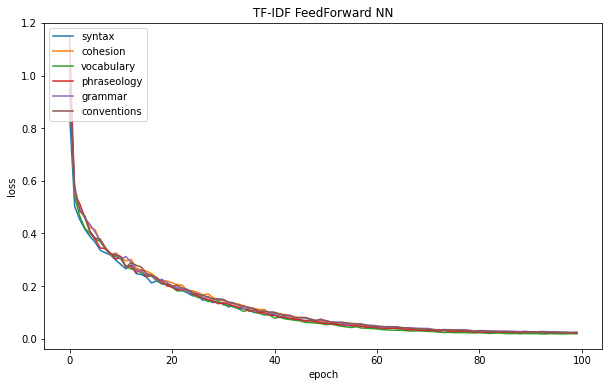

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_orig()

fig = plt.figure(figsize=(10, 6))

plt.plot(h1.history['loss'])
plt.plot(h2.history['loss'])
plt.plot(h3.history['loss'])
plt.plot(h4.history['loss'])
plt.plot(h5.history['loss'])
plt.plot(h6.history['loss'])

plt.title('TF-IDF FeedForward NN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['syntax','cohesion','vocabulary','phraseology','grammar','conventions'], loc='upper left')

# LSTM

In [48]:
lstm_embed_train = []
for i in range(0,len(tfidf_train)):
    lstm_embed_train.append(np.asarray([tfidf_train[i]]))

lstm_embed_test = []
for i in range(0,len(tfidf_test)):
    lstm_embed_test.append(np.asarray([tfidf_test[i]]))

lstm_embed_val = []
for i in range(0,len(tfidf_val)):
    lstm_embed_val.append(np.asarray([tfidf_val[i]]))

lstm_embed_test = np.asarray(lstm_embed_test)
lstm_embed_train = np.asarray(lstm_embed_train)
lstm_embed_val = np.asarray(lstm_embed_val)
print(lstm_embed_train.shape)
print(lstm_embed_val.shape)
print(lstm_embed_test.shape)


(3129, 1, 21370)
(391, 1, 21370)
(391, 1, 21370)


In [49]:
print(tfidf_train.shape)
print(tfidf_val.shape)
print(tfidf_test.shape)

(3129, 21370)
(391, 21370)
(391, 21370)


In [50]:
lstm_embed_train_final = []
for i in range(0,len(test)):
    lstm_embed_train_final.append(np.asarray([test[i]]))
lstm_embed_test_final = np.asarray(lstm_embed_train_final)
lstm_embed_test_final.shape

(3, 1, 21370)

In [51]:
def get_model_lstm():
    """Define the model."""
    
    model = Sequential()
    model.add(LSTM(128, input_shape=[1,IP], activation = 'tanh',return_sequences=True))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='relu'))

    model.summary()
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])

    return model


In [52]:
lstm_model1 = get_model_lstm()
lstm_model1.fit(lstm_embed_train, y1_train, epochs=100,validation_data=(lstm_embed_val,y1_val))
lstm_result_1 = lstm_model1.predict(lstm_embed_test_final).flatten()
lstm_result_1 = [int(r) for r in lstm_result_1]
len(lstm_result_1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            11007488  
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 1, 32)             4128      
_________________________________________________________________
dropout_19 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 1, 1)              33        
Total params: 11,011,649
Trainable params: 11,011,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 10s 73ms/step - loss: 1.4144 - accuracy: 0.0029 - val_l

3

In [53]:
lstm_model2 = get_model_lstm()
lstm_model2.fit(lstm_embed_train, y2_train, epochs=100,validation_data=(lstm_embed_val,y2_val))
lstm_result_2 = lstm_model2.predict(lstm_embed_test_final).flatten()
lstm_result_2 = [int(r) for r in lstm_result_2]
len(lstm_result_2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 128)            11007488  
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
dense_26 (Dense)             (None, 1, 32)             4128      
_________________________________________________________________
dropout_21 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 1, 1)              33        
Total params: 11,011,649
Trainable params: 11,011,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 9s 65ms/step - loss: 1.4824 - accuracy: 0.0019 - val_lo

3

In [54]:
lstm_model3 = get_model_lstm()
lstm_model3.fit(lstm_embed_train, y3_train, epochs=100,validation_data=(lstm_embed_val,y3_val))
lstm_result_3 = lstm_model3.predict(lstm_embed_test_final).flatten()
lstm_result_3 = [int(r) for r in lstm_result_3]
len(lstm_result_3)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 128)            11007488  
_________________________________________________________________
dropout_22 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
dense_28 (Dense)             (None, 1, 32)             4128      
_________________________________________________________________
dropout_23 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 1, 1)              33        
Total params: 11,011,649
Trainable params: 11,011,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 9s 65ms/step - loss: 1.4676 - accuracy: 3.1959e-04 - va

3

In [55]:
lstm_model4 = get_model_lstm()
lstm_model4.fit(lstm_embed_train, y4_train, epochs=100,validation_data=(lstm_embed_val,y4_val))
lstm_result_4 = lstm_model4.predict(lstm_embed_test_final).flatten()
lstm_result_4 = [int(r) for r in lstm_result_4]
len(lstm_result_4)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 128)            11007488  
_________________________________________________________________
dropout_24 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 1, 32)             4128      
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 1, 1)              33        
Total params: 11,011,649
Trainable params: 11,011,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 9s 63ms/step - loss: 1.4812 - accuracy: 0.0026 - val_lo

3

In [56]:
lstm_model5 = get_model_lstm()
lstm_model5.fit(lstm_embed_train, y5_train, epochs=100,validation_data=(lstm_embed_val,y5_val))
lstm_result_5 = lstm_model5.predict(lstm_embed_test_final).flatten()
lstm_result_5 = [int(r) for r in lstm_result_5]
len(lstm_result_5)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 128)            11007488  
_________________________________________________________________
dropout_26 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
dense_32 (Dense)             (None, 1, 32)             4128      
_________________________________________________________________
dropout_27 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 1, 1)              33        
Total params: 11,011,649
Trainable params: 11,011,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 9s 68ms/step - loss: 1.5009 - accuracy: 0.0019 - val_l

3

In [57]:
lstm_model6 = get_model_lstm()
lstm_model6.fit(lstm_embed_train, y6_train, epochs=100,validation_data=(lstm_embed_val,y6_val))
lstm_result_6 = lstm_model6.predict(lstm_embed_test_final).flatten()
lstm_result_6 = [int(r) for r in lstm_result_6]
len(lstm_result_6)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 128)            11007488  
_________________________________________________________________
dropout_28 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
dense_34 (Dense)             (None, 1, 32)             4128      
_________________________________________________________________
dropout_29 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 1, 1)              33        
Total params: 11,011,649
Trainable params: 11,011,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
98/98 [==============================] - 9s 63ms/step - loss: 1.6144 - accuracy: 0.0032 - val_l

3

In [58]:
results1 = embedding_model1.predict(lstm_embed_test).flatten()
results1= [round(r,1) for r in results1]  

results2 = embedding_model2.predict(lstm_embed_test).flatten()
results2 = [round(r,1) for r in results2]  

results3 = embedding_model3.predict(lstm_embed_test).flatten()
results3 = [round(r,1) for r in results3]  

results4 = embedding_model4.predict(lstm_embed_test).flatten()
results4 = [round(r,1) for r in results4]  

results5 = embedding_model5.predict(lstm_embed_test).flatten()
results5 = [round(r,1) for r in results5]  

results6 = embedding_model6.predict(lstm_embed_test).flatten()
results6 = [round(r,1) for r in results6]  

In [59]:
values1 = mean_squared_error(results1,y1_test)
values2 = mean_squared_error(results2,y2_test)
values3 = mean_squared_error(results3,y3_test)
values4 = mean_squared_error(results4,y4_test)
values5 = mean_squared_error(results5,y5_test)
values6 = mean_squared_error(results6,y6_test)

Test error for LSTM

In [60]:
test_error=values1+values2+values3+values4+values5+values6
test_mcrmse= test_error/6
test_mcrmse

0.46996163308468525

# Random Forest

In [61]:
rf1 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf1.fit(tfidf_train, y1_train)
y1_pred = rf1.predict(tfidf_test)
y1_pred = [round(r,1) for r in y1_pred]


In [62]:
rf2 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf2.fit(tfidf_train, y2_train)
y2_pred = rf2.predict(tfidf_test)
y2_pred = [round(r,1) for r in y2_pred]

In [63]:
rf3 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf3.fit(tfidf_train, y3_train)
y3_pred = rf3.predict(tfidf_test)
y3_pred = [round(r,1) for r in y3_pred]

In [64]:
rf4 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf4.fit(tfidf_train, y4_train)
y4_pred = rf4.predict(tfidf_test)
y4_pred = [round(r,1) for r in y4_pred]

In [65]:
rf5 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf5.fit(tfidf_train, y5_train)
y5_pred = rf5.predict(tfidf_test)
y5_pred = [round(r,1) for r in y5_pred]

In [66]:
rf6 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf6.fit(tfidf_train, y6_train)
y6_pred = rf6.predict(tfidf_test)
y6_pred = [round(r,1) for r in y6_pred]

In [67]:
values1 = mean_squared_error(y1_pred,y1_test)
values2 = mean_squared_error(y2_pred,y2_test)
values3 = mean_squared_error(y3_pred,y3_test)
values4 = mean_squared_error(y4_pred,y4_test)
values5 = mean_squared_error(y5_pred,y5_test)
values6 = mean_squared_error(y6_pred,y6_test)


Test error for Random Forest : 

In [68]:
test_error=values1+values2+values3+values4+values5+values6
test_mcrmse= test_error/6
test_mcrmse

0.30343563512361466

# Final predictions : 

In [ ]:
t1=pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/test.csv")

**Linear regression Predictions**

In [ ]:
y1_pred = lr1.predict(test)
y2_pred = lr2.predict(test)
y3_pred = lr3.predict(test)
y4_pred = lr4.predict(test)
y5_pred = lr5.predict(test)
y6_pred = lr6.predict(test)


test_lr1 = [round(r,1) for r in y1_pred]
test_lr2 = [round(r,1) for r in y2_pred]
test_lr3 = [round(r,1) for r in y3_pred]
test_lr4 = [round(r,1) for r in y4_pred]
test_lr5 = [round(r,1) for r in y5_pred]
test_lr6 = [round(r,1) for r in y6_pred]


In [ ]:
final_lr=pd.DataFrame()

final_lr['text_id']=t1["text_id"]
final_lr['syntax']=test_lr1
final_lr['cohesion']=test_lr2
final_lr['vocabulary']=test_lr3
final_lr['phraseology']=test_lr4
final_lr['grammar']=test_lr5
final_lr['conventions']=test_lr6  

In [ ]:
final_lr

**SVR predictions**

In [ ]:
y1_pred = clf1.predict(test)
y2_pred = clf2.predict(test)
y3_pred = clf3.predict(test)
y4_pred = clf4.predict(test)
y5_pred = clf5.predict(test)
y6_pred = clf6.predict(test)


test_clf1 = [round(r,1) for r in y1_pred]
test_clf2 = [round(r,1) for r in y2_pred]
test_clf3 = [round(r,1) for r in y3_pred]
test_clf4 = [round(r,1) for r in y4_pred]
test_clf5 = [round(r,1) for r in y5_pred]
test_clf6 = [round(r,1) for r in y6_pred]

In [ ]:
final_clf=pd.DataFrame()

final_clf['text_id']=t1["text_id"]
final_clf['syntax']=test_clf1
final_clf['cohesion']=test_clf2
final_clf['vocabulary']=test_clf3
final_clf['phraseology']=test_clf4
final_clf['grammar']=test_clf5
final_clf['conventions']=test_clf6  

In [ ]:
final_clf

**Neural Net predictions**

In [ ]:
test1 = embedding_model1.predict(test).flatten()
test_nn1= [round(r,1) for r in test1]  

test2 = embedding_model2.predict(test).flatten()
test_nn2= [round(r,1) for r in test2]

test3 = embedding_model3.predict(test).flatten()
test_nn3= [round(r,1) for r in test3]

test4 = embedding_model4.predict(test).flatten()
test_nn4= [round(r,1) for r in test4]

test5 = embedding_model5.predict(test).flatten()
test_nn5= [round(r,1) for r in test5]

test6 = embedding_model6.predict(test).flatten()
test_nn6= [round(r,1) for r in test6]

In [ ]:
final_nn=pd.DataFrame()

final_nn['text_id']=t1["text_id"]
final_nn['syntax']=test_nn1
final_nn['cohesion']=test_nn2
final_nn['vocabulary']=test_nn3
final_nn['phraseology']=test_nn4
final_nn['grammar']=test_nn5
final_nn['conventions']=test_nn6

In [ ]:
final_nn

**LSTM predictions**

In [ ]:
lstm_result_1 = lstm_model1.predict(lstm_embed_test_final).flatten()
lstm_result_1 = [int(r) for r in lstm_result_1]

lstm_result_2 = lstm_model2.predict(lstm_embed_test_final).flatten()
lstm_result_2 = [int(r) for r in lstm_result_2]

lstm_result_3 = lstm_model3.predict(lstm_embed_test_final).flatten()
lstm_result_3 = [int(r) for r in lstm_result_3]

lstm_result_4 = lstm_model4.predict(lstm_embed_test_final).flatten()
lstm_result_4 = [int(r) for r in lstm_result_4]

lstm_result_5 = lstm_model5.predict(lstm_embed_test_final).flatten()
lstm_result_5 = [int(r) for r in lstm_result_5]

lstm_result_6 = lstm_model6.predict(lstm_embed_test_final).flatten()
lstm_result_6 = [int(r) for r in lstm_result_6]

In [ ]:
final_LSTM=pd.DataFrame()

final_LSTM['text_id']=t1["text_id"]
final_LSTM['syntax']=lstm_result_1
final_LSTM['cohesion']=lstm_result_2
final_LSTM['vocabulary']=lstm_result_3
final_LSTM['phraseology']=lstm_result_4
final_LSTM['grammar']=lstm_result_5
final_LSTM['conventions']=lstm_result_6

In [ ]:
final_LSTM

**Random Forest predictions**

In [ ]:
y1_pred = rf1.predict(test)
pred_rf1 = [round(r,1) for r in y1_pred]

y2_pred = rf2.predict(test)
pred_rf2 = [round(r,1) for r in y2_pred]

y3_pred = rf3.predict(test)
pred_rf3 = [round(r,1) for r in y3_pred]

y4_pred = rf4.predict(test)
pred_rf4 = [round(r,1) for r in y4_pred]

y4_pred = rf5.predict(test)
pred_rf5 = [round(r,1) for r in y5_pred]

y6_pred = rf6.predict(test)
pred_rf6 = [round(r,1) for r in y6_pred]

In [ ]:
final_rf=pd.DataFrame()

final_rf['text_id']=t1["text_id"]
final_rf['syntax']=pred_rf1
final_rf['cohesion']=pred_rf2
final_rf['vocabulary']=pred_rf3
final_rf['phraseology']=pred_rf4
final_rf['grammar']=pred_rf5
final_rf['conventions']=pred_rf6

In [ ]:
final_rf

**To csv...**

In [ ]:
final_lr.to_csv('submission1.csv', index=False)
final_clf.to_csv('submission2.csv', index=False)
final_nn.to_csv('submission3.csv', index=False)
final_LSTM.to_csv('submission4.csv', index=False)
final_rf.to_csv('submission5.csv', index=False)